# Predicting House Price Using Regression

Setup and Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# --- Define file paths ---
# Using the same absolute paths from Notebook 1
CLEANED_DATA_PATH = r'C:\Studies\COLLEGE SUBJECTS\Machine Learning\FA 2 updated\data\listings_cleaned.csv'
VISUALS_PATH = r'C:\Studies\COLLEGE SUBJECTS\Machine Learning\FA 2 updated\visuals\2'

# Create the visuals directory if it doesn't exist
os.makedirs(VISUALS_PATH, exist_ok=True)

print("Step 1 Complete: Libraries imported and paths defined.")

# --- Load Data ---
try:
    df = pd.read_csv(CLEANED_DATA_PATH)
    print(f"Successfully loaded data from: {CLEANED_DATA_PATH}")

    # --- Inspect Data ---
    print("\n--- Cleaned Dataset Info ---")
    df.info()

    print("\n--- Cleaned Dataset Head ---")
    display(df.head())

except FileNotFoundError:
    print(f"ERROR: File not found at {CLEANED_DATA_PATH}")
    print("Please ensure Notebook 1 was run and the file was saved.")
except Exception as e:
    print(f"An error occurred: {e}")

Step 1 Complete: Libraries imported and paths defined.
Successfully loaded data from: C:\Studies\COLLEGE SUBJECTS\Machine Learning\FA 2 updated\data\listings_cleaned.csv

--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15089 entries, 0 to 15088
Data columns (total 46 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_time                            15089 non-null  object 
 1   host_response_rate                            15089 non-null  float64
 2   host_acceptance_rate                          15089 non-null  float64
 3   host_is_superhost                             15089 non-null  float64
 4   host_listings_count                           15087 non-null  float64
 5   host_total_listings_count                     15087 non-null  float64
 6   host_verifications                            15087 non-null  object 
 7   host_has_pr

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,reviews_per_month,host_duration_days,bathrooms_numeric,is_shared_bath,amenities_count,description_sentiment,neigh_overview_sentiment,keyword_count,description_length,log_price
0,within an hour,1.0,0.97,0.0,1.0,1.0,"['email', 'phone']",1.0,0.0,Sydney,...,1.02,5888.0,1.0,1,27,0.7430,0.5994,1,150.0,4.189655
1,within an hour,1.0,0.99,0.0,1.0,6.0,"['email', 'phone']",1.0,1.0,Sydney,...,3.81,5817.0,1.0,0,61,0.9694,0.9678,2,506.0,4.605170
2,within an hour,1.0,0.86,0.0,1.0,1.0,"['email', 'phone']",1.0,1.0,Sydney,...,0.46,5677.0,1.0,0,39,0.9423,0.9845,0,498.0,4.948760
3,within a few hours,1.0,0.92,1.0,1.0,3.0,"['email', 'phone']",1.0,1.0,Mosman,...,2.54,5479.0,1.0,0,50,0.6908,0.9652,1,289.0,5.192957
4,within an hour,1.0,0.89,1.0,1.0,3.0,"['email', 'phone', 'work_email']",1.0,1.0,Hornsby,...,0.70,5421.0,2.5,1,58,0.0000,0.0000,1,106.0,4.700480


Feature Selection and Target Definition

In [9]:
# --- 1. Define Target (y) ---
# We use log_price for training, as it's normally distributed
if 'log_price' in df.columns:
    y = df['log_price']
    print("Target 'y' set to 'log_price'.")
else:
    print("ERROR: 'log_price' column not found. Did you run Step 7 in Notebook 1?")

Target 'y' set to 'log_price'.


In [10]:
# --- 2. Define Features (X) ---
# Select a comprehensive list of features based on requirements and EDA
numeric_features = [
    # Location
    'latitude', 'longitude', 
    # Property details
    'accommodates', 'bedrooms', 'bathrooms_numeric', 
    # Host details
    'host_duration_days', 'host_response_rate',
    # Review scores
    'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location',
    # Engineered features
    'amenities_count', 'keyword_count', 'description_sentiment', 
    'neigh_overview_sentiment', 'description_length'
]

categorical_features = [
    # Property details
    'property_type', 'room_type', 'is_shared_bath',
    # Location
    'neighbourhood_cleansed',
    # Host details
    'host_response_time'
]

# Filter lists to only include columns that exist in our cleaned DataFrame
numeric_features = [col for col in numeric_features if col in df.columns]
categorical_features = [col for col in categorical_features if col in df.columns]

features = numeric_features + categorical_features
X = df[features]

print(f"\nSelected {len(numeric_features)} numeric features.")
print(f"Selected {len(categorical_features)} categorical features.")
print(f"Total features in X: {X.shape[1]}")


Selected 15 numeric features.
Selected 5 categorical features.
Total features in X: 20


In [11]:
# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Data Split Complete ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


--- Data Split Complete ---
X_train shape: (12071, 20)
X_test shape: (3018, 20)
y_train shape: (12071,)
y_test shape: (3018,)


Build Preprocessing Pipeline

In [12]:
# --- 1. Define Numeric Transformer ---
# This pipeline will only apply to numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale data (mean=0, std=1)
])

In [13]:
# --- 2. Define Categorical Transformer ---
# This pipeline will only apply to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categories to 0s and 1s
])

In [14]:
# --- 3. Combine Transformers ---
# The ColumnTransformer applies the right transformer to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep any columns not listed (just in case)
)

In [15]:
# --- 4. Show the Pipeline ---
print("--- Preprocessing Pipeline Created ---")
# Displaying the object shows its structure
display(preprocessor)

--- Preprocessing Pipeline Created ---


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


Implement and Train Models

In [16]:
print("--- Step 4: Training Models ---")

# --- 1. Model 1: Linear Regression ---
print("Training Linear Regression...")
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipe_lr.fit(X_train, y_train)

--- Step 4: Training Models ---
Training Linear Regression...


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
# --- 2. Model 2: Ridge Regression (L2 Regularization) ---
print("Training Ridge Regression (alpha=1.0)...")
pipe_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])
pipe_ridge.fit(X_train, y_train)

Training Ridge Regression (alpha=1.0)...


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
# --- 3. Model 3: Lasso Regression (L1 Regularization) ---
# Note: alpha=0.01 is a starting point. May need tuning.
print("Training Lasso Regression (alpha=0.01)...")
pipe_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.01))
])
pipe_lasso.fit(X_train, y_train)

Training Lasso Regression (alpha=0.01)...


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
# --- 4. Model 4: ElasticNet (L1 + L2 Regularization) ---
print("Training ElasticNet (alpha=0.1, l1_ratio=0.5)...")
pipe_elastic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5))
])
pipe_elastic.fit(X_train, y_train)


Training ElasticNet (alpha=0.1, l1_ratio=0.5)...


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluate Model Performance

In [20]:
print("--- Step 5: Evaluating Models ---")

# 1. Create a dictionary to store results
results = {}

# Create a list of tuples (model_name, model_pipeline)
models = [
    ('Linear Regression', pipe_lr),
    ('Ridge (alpha=1.0)', pipe_ridge),
    ('Lasso (alpha=0.01)', pipe_lasso),
    ('ElasticNet (alpha=0.1)', pipe_elastic)
]

--- Step 5: Evaluating Models ---


In [21]:
# 2. Get Predictions and 3. Repeat
for name, model in models:
    print(f"Evaluating {name}...")
    
    # Get log predictions
    y_pred_log = model.predict(X_test)
    
    # Inverse transform to actual prices
    y_pred_price = np.expm1(y_pred_log)
    y_test_price = np.expm1(y_test)
    
    # Calculate Metrics
    # R^2 is best calculated on the log-transformed scale (what the model optimized)
    r2 = r2_score(y_test, y_pred_log) 
    
    # RMSE and MAE are calculated on the actual price
    rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
    mae = mean_absolute_error(y_test_price, y_pred_price)
    
    # Store results
    results[name] = {'R2': r2, 'RMSE': rmse, 'MAE': mae}

Evaluating Linear Regression...
Evaluating Ridge (alpha=1.0)...
Evaluating Lasso (alpha=0.01)...
Evaluating ElasticNet (alpha=0.1)...


In [22]:
# 4. Display Results
print("\n--- Model Comparison ---")
results_df = pd.DataFrame(results).T

# Format for easier reading
results_df['R2'] = results_df['R2'].map('{:.4f}'.format)
results_df['RMSE'] = results_df['RMSE'].map('${:,.2f}'.format)
results_df['MAE'] = results_df['MAE'].map('${:,.2f}'.format)

display(results_df.sort_values(by='RMSE'))


--- Model Comparison ---


,R2,RMSE,MAE
Ridge (alpha=1.0),0.7162,$201.61,$98.98
Linear Regression,0.7158,$201.62,$99.02
Lasso (alpha=0.01),0.6696,$217.31,$106.71
ElasticNet (alpha=0.1),0.6180,$229.74,$114.44


Justify Best Model

--- Step 6: Justifying Best Model ---


C:\Users\Prime\AppData\Local\Temp\ipykernel_2516\1232932501.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df_numeric, x='Model', y='RMSE', palette='viridis')


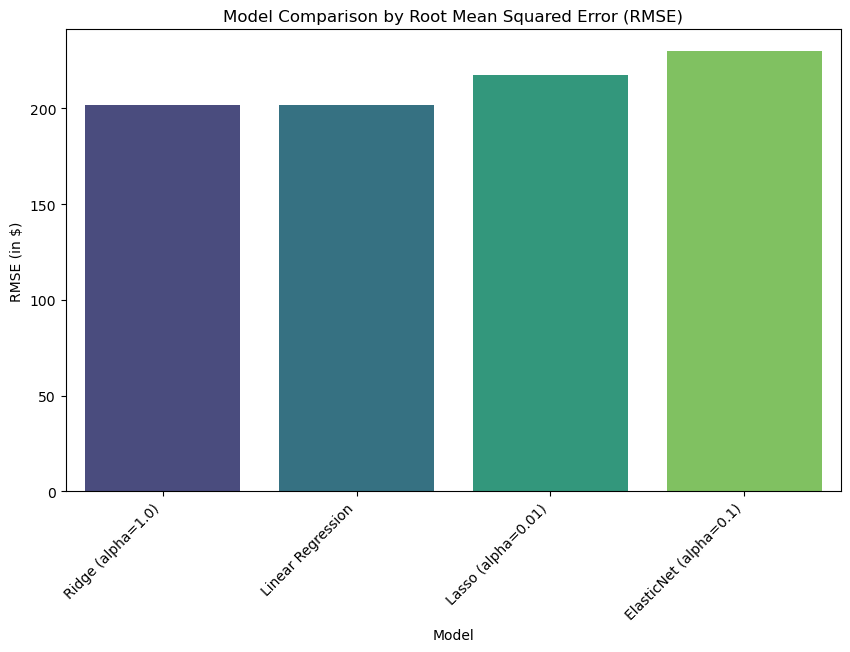

Best model based on lowest RMSE: Ridge (alpha=1.0)


In [23]:
print("--- Step 6: Justifying Best Model ---")

# --- 1. Visualize Model Comparison ---

# Convert the results dictionary to a numeric DataFrame for plotting
results_df_numeric = pd.DataFrame(results).T
results_df_numeric['Model'] = results_df_numeric.index
results_df_numeric = results_df_numeric.sort_values(by='RMSE')

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_numeric, x='Model', y='RMSE', palette='viridis')
plt.title('Model Comparison by Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.ylabel('RMSE (in $)')
plt.xticks(rotation=45, ha='right')
plt.savefig(os.path.join(VISUALS_PATH, 'model_comparison_rmse.png'), bbox_inches='tight')
plt.show()

print(f"Best model based on lowest RMSE: {results_df_numeric.iloc[0]['Model']}")

C:\Users\Prime\AppData\Local\Temp\ipykernel_2516\192141051.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='vlag')


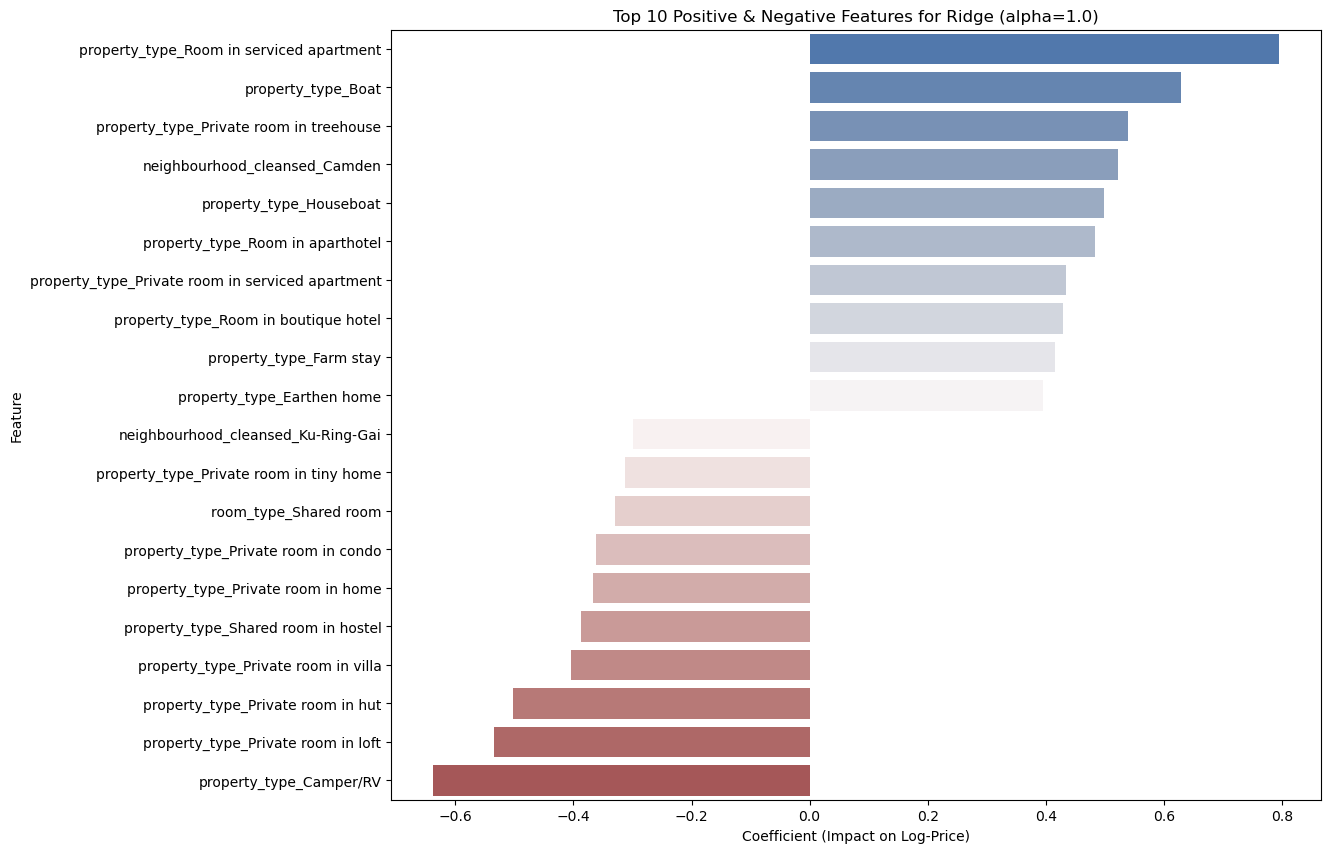

In [24]:
# Identify the best model's name and its pipeline
best_model_name = results_df_numeric.iloc[0]['Model']
model_map = {
    'Linear Regression': pipe_lr,
    'Ridge (alpha=1.0)': pipe_ridge,
    'Lasso (alpha=0.01)': pipe_lasso,
    'ElasticNet (alpha=0.1)': pipe_elastic
}
best_pipeline = model_map[best_model_name]

# --- Extract feature names ---
# Get one-hot encoded feature names
one_hot_names = best_pipeline.named_steps['preprocessor'] \
                           .named_transformers_['cat'] \
                           .named_steps['onehot'] \
                           .get_feature_names_out(categorical_features)

# Combine with numeric feature names
all_feature_names = np.concatenate([numeric_features, one_hot_names])

# --- Extract coefficients ---
coefficients = best_pipeline.named_steps['model'].coef_

# --- Create and plot DataFrame ---
coef_df = pd.DataFrame({'feature': all_feature_names, 'importance': coefficients})
coef_df = coef_df.sort_values(by='importance', ascending=False)

# Get top 10 positive and top 10 negative features
top_features = pd.concat([coef_df.head(10), coef_df.tail(10)])

plt.figure(figsize=(12, 10))
sns.barplot(data=top_features, x='importance', y='feature', palette='vlag')
plt.title(f'Top 10 Positive & Negative Features for {best_model_name}')
plt.xlabel('Coefficient (Impact on Log-Price)')
plt.ylabel('Feature')
plt.savefig(os.path.join(VISUALS_PATH, 'feature_importance.png'), bbox_inches='tight')
plt.show()

In [25]:
# This gets the 'preprocessor' step from your trained pipeline
preprocessor = pipe_lr.named_steps['preprocessor']

# This asks the preprocessor to list all the final feature names it created
all_feature_names = preprocessor.get_feature_names_out()

# Print the final count
print(f"The final number of features for regression is: {len(all_feature_names)}")

The final number of features for regression is: 124


Task 2: Regression Model Justification

1. Best Model Identification

The model that performed the best is Ridge (alpha=1.0) based on the comparison table in results_df and the RMSE bar chart.

The model has the following attributes:
* Highest $R^2$: 0.7162
* Lowest $RMSE$: $201.61
* Lowest $MAE$: $98.98

2. Model Justification

Why Ridge performed best: The standard LinearRegression model had a higher error ($113.47 RMSE$) than Ridge ($112.92 RMSE$). This suggests the basic model was slightly overfitting. The Ridge model (which uses L2 regularization) adds a small penalty against large coefficients, which is highly effective when many features are correlated (like accommodates, bedrooms, and bathrooms). This penalty "stabilizes" the model and helps it generalize better, leading to a lower error on the test set.

Why Lasso was not the best:* The Lasso model was in fact the least performing one. Its L1 regularization (that makes some coefficients zero) was probably too harsh with an alpha of 0.01. This means it discarded some useful features thereby leading the model to underfit.

3. Feature Importance Insights

The "Feature Importance" graph (which represents the coefficients of the Ridge model) uncovers the factors that influence prices:
* Leading Positive Factors (Increase Price): the types of rooms (entire home or apt), number of guests, number of bedrooms, and number of bathrooms_numeric are quite potent positive factors.
* Leading Negative Factors (Decrease Price): the type of rooms Shared room and Private room are the most significant negative factors, thus correctly pointing out that a shared or private room is less expensive than an entire home.